In [190]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [192]:
directory = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/Cambridge/AI4ER/Easter/MRes/CrunchFlow_Work/sandbox/2022-05-06_basalt-cube-model_1-0_nosweep/tec2csv/"
catList, max_time = data_cats(directory)
print(catList)
print(max_time)

{'conc', 'affinity_term', 'porosity', 'volume', 'area', 'pH', 'saturation', 'velocity', 'tortuosity', 'TotMineral', 'totcon', 'rate'}
6


In [193]:
# Iterate through all the files in order, generating dataframes that need compiling.
metric_final_dataframes = []
for _ in catList:
    metric_dataframes = []
    for __ in range(max_time):
        df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
        df["timestep"] = str(__+1)
        metric_dataframes.append(df)
    df = pd.concat(metric_dataframes)
    df["metric"] = str(_)
    metric_final_dataframes.append(df)

final_df = pd.concat(metric_final_dataframes)

In [194]:
print("Metrics possible to visualise are as follows:")
print(catList)

Metrics possible to visualise are as follows:
{'conc', 'affinity_term', 'porosity', 'volume', 'area', 'pH', 'saturation', 'velocity', 'tortuosity', 'TotMineral', 'totcon', 'rate'}


In [211]:
metric_choice = "conc"
# metric_choice = "affinity_term"
# metric_choice = "porosity"
# metric_choice = "volume"
# metric_choice = "pH"
# metric_choice = "saturation"
# metric_choice = "velocity"
# metric_choice = "tortuosity"
# metric_choice = "TotMineral"
# metric_choice = "totcon"
# metric_choice = "rate"

In [212]:
new_df = final_df[final_df.metric == metric_choice]
new_df = new_df.dropna(axis=1)

In [213]:
print("Sub-metrics possible to visualise are as follows:")
submetrics = np.array(new_df.columns)
submetrics = submetrics[submetrics != "X"]
submetrics = submetrics[submetrics != "Y"]
submetrics = submetrics[submetrics != "Z"]
submetrics = submetrics[submetrics != "timestep"]
submetrics = submetrics[submetrics != "metric"]
print(submetrics)

Sub-metrics possible to visualise are as follows:
['H+' 'SiO2(aq)' 'Mg++' 'Fe++' 'Ca++' 'Al+++' 'Na+' 'Cl-' 'OH-' 'Al(OH)2+'
 'Al13O4(OH)24(7' 'Al2(OH)2++++' 'Al3(OH)4(5+)' 'AlO2-' 'AlOH++' 'CaCl+'
 'CaCl2(aq)' 'CaOH+' 'Fe(OH)2(aq)' 'Fe(OH)3-' 'Fe(OH)4--' 'FeCl+'
 'FeCl2(aq)' 'FeCl4--' 'FeOH+' 'H2SiO4--' 'H4(H2SiO4)4---' 'H6(H2SiO4)4--'
 'HAlO2(aq)' 'HCl(aq)' 'HSiO3-' 'Mg4(OH)4++++' 'MgCl+' 'NaAlO2(aq)'
 'NaCl(aq)' 'NaHSiO3(aq)' 'NaOH(aq)']


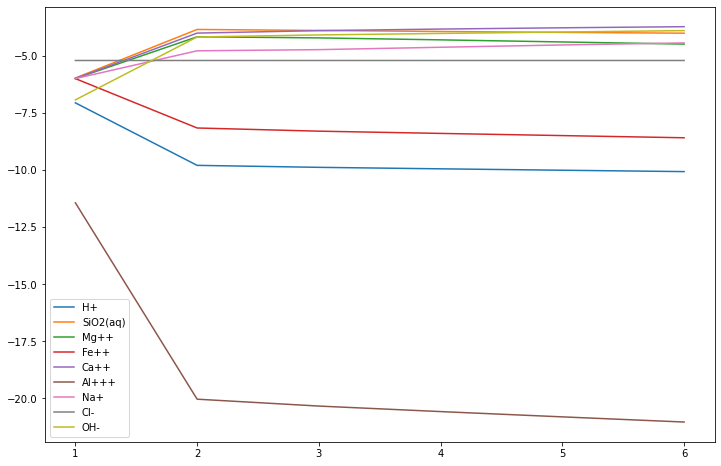

In [214]:
# @ >> 'conc' selections
submetric_choices = ['H+', 'SiO2(aq)', 'Mg++', 'Fe++', 'Ca++', 'Al+++', 'Na+', 'Cl-', 'OH-']

# @ >> 'porosity' selections
# submetric_choices = ['Porosity']

# @ >> 'volume' selections
# submetric_choices = ['Forsterite', 'Fayalite', 'Wollastonite', 'Enstatite', 'Ferrosilite', 'Anorthite', 'Albite']

# @ >> 'pH' selections
# submetric_choices = ['pH']

# @ >> 'saturation' selections
# submetric_choices = ['Forsterite', 'Fayalite', 'Wollastonite', 'Enstatite', 'Ferrosilite', 'Anorthite', 'Albite']

# @ >> 'TotMineral' selections
# submetric_choices = ['H+', 'SiO2(aq)', 'Mg++', 'Fe++', 'Ca++', 'Al+++', 'Na+', 'Cl-']

# @ >> 'totcon' selections
# submetric_choices = ['H+', 'SiO2(aq)', 'Mg++', 'Fe++', 'Ca++', 'Al+++', 'Na+', 'Cl-']

# @ >> 'rate' selections
# submetric_choices = ['Forsterite', 'Fayalite', 'Wollastonite', 'Enstatite', 'Ferrosilite', 'Anorthite', 'Albite']

anti_choice = submetrics
for _ in submetric_choices:
    anti_choice = anti_choice[anti_choice != _]

newer_df = new_df.drop(anti_choice, axis=1)

plt.figure(figsize=(12,8))

for _ in submetric_choices:
    plt.plot(newer_df["timestep"], newer_df[_], label=_)

plt.legend()
plt.show()